In [12]:
using Plots, ForwardDiff, Printf, LinearAlgebra

In [13]:
#Gradient method with backtracking
function grad_method_backtracking(fObj, gObj, x0; ϵ = 1e-6, μ = 1e-5, maxits = 1000)
    x = copy(x0)
    f = fObj(x)
    ∇f = gObj(x)
    k = 0
    xtrace = x'
    while norm(∇f) > ϵ && k < maxits
        α = 1.0
        while ((f - fObj(x-α*∇f)) < μ*α*dot(∇f,∇f) )
            α /=2
        end
        x = x-α*∇f
        f = fObj(x)
        ∇f = gObj(x)
        k += 1
        xtrace = vcat(xtrace,x')
    end
    @printf "it = %3d | |∇f| = %8.2e | f = %8.2e\n" k norm(∇f) f
    return x, xtrace
end

grad_method_backtracking (generic function with 1 method)

In [15]:
#Apply gradient method with backtracking to Rosenbrock function
f(x) = 100(x[2]-x[1]^2)^2+(1-x[1])^2
∇f(x) = ForwardDiff.gradient(f,x)
x0 = [2,5]
x, xtrace = grad_method_backtracking(f, ∇f, x0, μ = 1e-4, maxits = 1000);

it = 1000 | |∇f| = 1.56e+00 | f = 1.33e+00


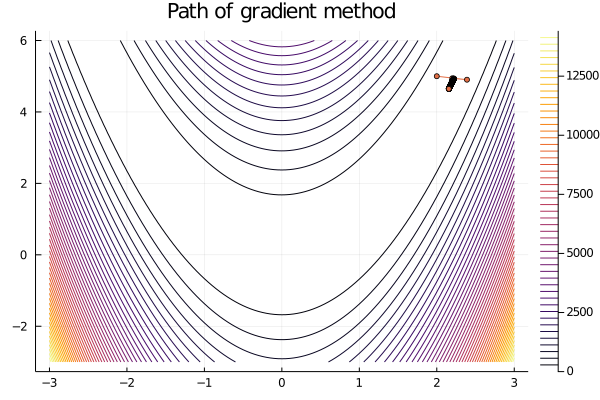

In [16]:
#Contour plot
f(x1,x2) = 100(x2-x1^2)^2+(1-x1)^2
x1 = -3:0.05:3
x2 = -3:0.05:6
contour(x1, x2, f, levels = 50)
plot!(xtrace[:,1],xtrace[:,2],marker = 3,legend = false, title = "Path of gradient method")

In [17]:
Hf = [802 -400;-400 200]
κ=eigmax(Hf)/eigmin(Hf)

2508.0096012775152

In [18]:
#Gradient method with backtracking
function Newton_grad_method_backtracking(fObj, gObj, hObj, x0; ϵ = 1e-6, μ = 1e-5, maxits = 1000)
    x = copy(x0)
    f = fObj(x)
    ∇f = gObj(x)
    ∇2f = hObj(x)
    k = 0
    xtrace = x'
    while norm(∇f) > ϵ && k < maxits
        if isposdef(∇2f) == true
            ## L L^T d = - ∇f
            C = cholesky(∇2f)
            d = C.U \ (C.L \ ∇f)
        else
            d = ∇f
        end
        α = 1.0
        while ((f - fObj(x-α*d)) < μ*α*dot(∇f,d) )
            α /=2
        end
        x = x-α*d
        f = fObj(x)
        ∇f = gObj(x)
        ∇2f = hObj(x)
        k += 1
        xtrace = vcat(xtrace,x')
    end
    @printf "it = %3d | |∇f| = %8.2e | f = %8.2e\n" k norm(∇f) f
    return x, xtrace
end

Newton_grad_method_backtracking (generic function with 1 method)

In [20]:
#Apply gradient method with backtracking to Rosenbrock function
f(x) = 100(x[2]-x[1]^2)^2+(1-x[1])^2
∇f(x) = ForwardDiff.gradient(f,x)
∇2f(x) = ForwardDiff.hessian(f,x)
x0 = [2,5]
x, xtrace = Newton_grad_method_backtracking(f, ∇f, ∇2f, x0, μ = 1e-4, maxits = 1000);

it =  17 | |∇f| = 4.86e-13 | f = 2.26e-26


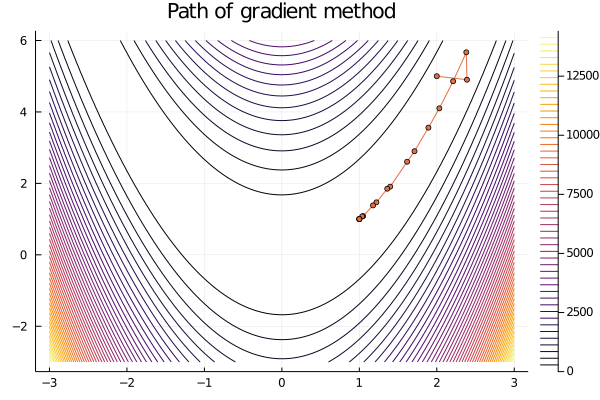

In [21]:
#Contour plot
f(x1,x2) = 100(x2-x1^2)^2+(1-x1)^2
x1 = -3:0.05:3
x2 = -3:0.05:6
contour(x1, x2, f, levels = 50)
plot!(xtrace[:,1],xtrace[:,2],marker = 3,legend = false, title = "Path of Newton-gradient method")